# JYS Sprint One
### Joe Gallagher, Yashasvi Bhati, Shivam Bhagat
### Applied Machine Learning - DSC-681-001
### Prof. Jared Mroz
### November 6, 2023

This notebook is the JYS team's exploratory data analysis (EDA) of the data provided by Netrality.
Each team member was responsible for performing EDA on one of the three data sets provided.
Joe Gallagher was responsible for the Current Billing data, Yashasvi Bhati was responsible for the current customer
data, and Shivam Bhagat was responsible for the prospective customer data.

The notebook is sectioned accordingly.

## Current Billing EDA - Joe Gallagher

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading in the Netrality Current Billing Data
currentBilling = pd.read_csv('current_billing.csv')
currentBilling.head(5)

,CompanyID,Lifetime_Park Place,Lifetime_Boardwalk,Lifetime_StJamesPlace,Lifetime_Marvin Gardens,Lifetime_Ventnor,Lifetime_Kentucky,Lifetime_Tennessee,Lifetime_Pennslyvania,Last_Month_Park Place,Last_Month_Boardwalk,Last_Month_StJamesPlace,Last_Month_Marvin Gardens,Last_Month_Ventnor,Last_Month_Kentucky,Last_Month_Tennessee,Last_Month_Pennslyvania
0,1475361,-0.070063,0.136329,NaN,0.811350,NaN,NaN,1.753205,NaN,-0.148246,-0.085591,NaN,0.798386,NaN,NaN,1.037185,NaN
1,16400573,-0.033258,NaN,NaN,NaN,NaN,NaN,0.171361,NaN,-0.110040,NaN,NaN,NaN,NaN,NaN,-0.121411,NaN
2,246280,NaN,NaN,6.757425,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.405451,NaN,NaN,NaN,NaN,NaN
3,43076614,NaN,NaN,13.025724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.937410,NaN,NaN,NaN,NaN,NaN
4,126828694,6.300050,1.515290,4.322832,11.780571,0.240241,0.263761,1.047302,NaN,2.245466,0.590702,0.860277,3.875073,0.175216,-0.051244,0.348938,NaN


In [3]:
#Looks like there are a lot of NaNs in the data, lets change those to 0's to make life easier later
currentBilling = currentBilling.fillna(0)
currentBilling.head(5)

,CompanyID,Lifetime_Park Place,Lifetime_Boardwalk,Lifetime_StJamesPlace,Lifetime_Marvin Gardens,Lifetime_Ventnor,Lifetime_Kentucky,Lifetime_Tennessee,Lifetime_Pennslyvania,Last_Month_Park Place,Last_Month_Boardwalk,Last_Month_StJamesPlace,Last_Month_Marvin Gardens,Last_Month_Ventnor,Last_Month_Kentucky,Last_Month_Tennessee,Last_Month_Pennslyvania
0,1475361,-0.070063,0.136329,0.000000,0.811350,0.000000,0.000000,1.753205,0.0,-0.148246,-0.085591,0.000000,0.798386,0.000000,0.000000,1.037185,0.0
1,16400573,-0.033258,0.000000,0.000000,0.000000,0.000000,0.000000,0.171361,0.0,-0.110040,0.000000,0.000000,0.000000,0.000000,0.000000,-0.121411,0.0
2,246280,0.000000,0.000000,6.757425,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.405451,0.000000,0.000000,0.000000,0.000000,0.0
3,43076614,0.000000,0.000000,13.025724,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,4.937410,0.000000,0.000000,0.000000,0.000000,0.0
4,126828694,6.300050,1.515290,4.322832,11.780571,0.240241,0.263761,1.047302,0.0,2.245466,0.590702,0.860277,3.875073,0.175216,-0.051244,0.348938,0.0


**How many different service locations are in Current Billing?**

In [4]:
colNames = [] #This is a blank list of all the column names in Current Billing
for col in currentBilling: #This for loop iterates through all the column names in Current Billing
  colNames.append(col)     #This will add each column name in Current Billing to the above blank list

colNames.pop(0) #This will remove the 'CompanyID' field, leaving only the column names with location names in the list

locationNames = [] #This is a blank list where we'll input all the location names
for x in colNames: #This for loop will iterate through all the values in the colNames list
  dummy = x.split('_') #This dummy variable will save a list of all the strings between underscores in the colNames values
  locationNames.append(dummy[-1]) #This will add the last string from each value (the location name) into the locationNames list

locationNames = list(set(locationNames)) #This will remove duplicate values from the list, as each location was labeled twice for monthly and lifetime earnings
print("Current billing contains billing information for " + str(len(locationNames)) + " locations.")

Current billing contains billing information for 8 locations.


**How much money has each location made overall?**

In [5]:
for col in colNames:
  dummy = col.split('_')
  if dummy[0] == 'Lifetime':
    lifetimeTotal = currentBilling[col].sum()
    print(dummy[-1] +' has made ' + str(lifetimeTotal) + ' total.')
    print(' ')

Park Place has made 17.314004146 total.
 
Boardwalk has made 32.92946802 total.
 
StJamesPlace has made 60.06895314 total.
 
Marvin Gardens has made 113.61212781300001 total.
 
Ventnor has made 1.7160574940000002 total.
 
Kentucky has made 1.6902305370000004 total.
 
Tennessee has made 26.526001035 total.
 
Pennslyvania has made 0.0 total.
 


**How much money did each location make last month?**

In [6]:
for col in colNames:
  dummy = col.split('_')
  if dummy[0] == 'Last':
    lifetimeTotal = currentBilling[col].sum()
    print(dummy[-1] +' has made ' + str(lifetimeTotal) + ' last month.')
    print(' ')

Park Place has made -0.4113190310000001 last month.
 
Boardwalk has made 5.147660546999999 last month.
 
StJamesPlace has made 8.552460765000001 last month.
 
Marvin Gardens has made 40.165705563 last month.
 
Ventnor has made 0.31553799299999985 last month.
 
Kentucky has made -2.909715023 last month.
 
Tennessee has made -5.906977822999998 last month.
 
Pennslyvania has made 0.0 last month.
 


**How many companies does each location serve?**

In [7]:
currentBilling.astype(bool).sum()

CompanyID                    328
Lifetime_Park Place           54
Lifetime_Boardwalk            64
Lifetime_StJamesPlace        110
Lifetime_Marvin Gardens       78
Lifetime_Ventnor              23
Lifetime_Kentucky             31
Lifetime_Tennessee           131
Lifetime_Pennslyvania          0
Last_Month_Park Place         53
Last_Month_Boardwalk          62
Last_Month_StJamesPlace      110
Last_Month_Marvin Gardens     77
Last_Month_Ventnor            23
Last_Month_Kentucky           30
Last_Month_Tennessee         130
Last_Month_Pennslyvania        0
dtype: int64

**How many coustomers does Netrality currently have?**

In [8]:
currentCustomers = pd.read_csv('current_customers.csv')
countCurrentCust = currentCustomers['CompanyID'].astype(bool).sum()
print('Netrality currently has ' + str(countCurrentCust) + ' customers.')

Netrality currently has 329 customers.


In [9]:
currentBilling.describe()

,CompanyID,Lifetime_Park Place,Lifetime_Boardwalk,Lifetime_StJamesPlace,Lifetime_Marvin Gardens,Lifetime_Ventnor,Lifetime_Kentucky,Lifetime_Tennessee,Lifetime_Pennslyvania,Last_Month_Park Place,Last_Month_Boardwalk,Last_Month_StJamesPlace,Last_Month_Marvin Gardens,Last_Month_Ventnor,Last_Month_Kentucky,Last_Month_Tennessee,Last_Month_Pennslyvania
count,3.280000e+02,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.0,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.0
mean,1.991664e+08,0.052787,0.100395,0.183137,0.346378,0.005232,0.005153,0.080872,0.0,-0.001254,0.015694,0.026075,0.122456,0.000962,-0.008871,-0.018009,0.0
std,1.852784e+08,0.426964,0.525249,1.104666,3.415637,0.068889,0.051529,0.319951,0.0,0.146359,0.190112,0.348447,1.102284,0.060968,0.032848,0.133231,0.0
min,2.462800e+05,-0.075611,-0.078569,-0.075265,-0.075411,-0.076149,-0.075611,-0.075611,0.0,-0.224215,-0.881855,-0.287594,-0.171566,-0.242080,-0.151048,-0.792421,0.0
25%,3.255303e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.088892,0.0
50%,1.096502e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,3.544963e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,1.240159e+09,6.300050,5.501002,13.025724,58.999383,0.979010,0.645165,2.989057,0.0,2.245466,1.749583,4.937410,16.546648,0.844695,0.079619,1.063733,0.0


In [10]:
#Which company has the largest lifetime spend across all locations?


totalLifeSpend = currentBilling.iloc[...,1:9].sum(axis = 1)
currentBilling['Total_Lifetime_Spend'] = totalLifeSpend
companySpend = currentBilling[['CompanyID','Total_Lifetime_Spend']].copy()
companySpend.sort_values('Total_Lifetime_Spend', ascending = False)


,CompanyID,Total_Lifetime_Spend
62,346209844,58.999383
4,126828694,25.470047
140,368572921,16.212611
3,43076614,13.025724
34,27003689,10.601689
...,...,...
297,53350801,-0.116354
287,369784430,-0.152835
318,354177597,-0.300318
300,369209280,-0.345347


In [11]:
currentCustomers = currentCustomers.join(companySpend.set_index('CompanyID'), on = 'CompanyID', how = 'left')

In [12]:
currentCustomers.describe()

,CompanyID,Founded_Year,Revenue_(in_000s_USD),Est_Marketing_Department_Budget_(in_000s_USD),Est_Finance_Department_Budget_(in_000s_USD),Est_IT_Department_Budget_(in_000s_USD),Est_HR_Department_Budget_(in_000s_USD),Employees,Past_1_Year_Employee_Growth_Rate,Past_2_Year_Employee_Growth_Rate,SIC_Code_1,SIC_Code_2,NAICS_Code_1,NAICS_Code_2,Alexa_Rank,Total_Funding_Amount_(in_000s_USD),Recent_Funding_Amount_(in_000s_USD),Number_of_Locations,Total_Lifetime_Spend
count,3.290000e+02,311.000000,3.290000e+02,3.270000e+02,3.270000e+02,3.270000e+02,3.290000e+02,3.290000e+02,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,2.830000e+02,3.290000e+02,3.290000e+02,321.000000,328.000000
mean,2.000547e+08,1988.006431,8.876763e+06,7.787685e+05,9.971928e+04,2.922070e+05,3.015184e+04,1.323888e+04,5.124620,8.216717,6526.246201,3350.589666,530602.990881,366782.492401,5.190865e+06,4.980478e+05,1.698524e+05,15.517134,0.773954
std,1.856962e+08,32.181140,5.287259e+07,4.873709e+06,5.512918e+05,1.582583e+06,2.451531e+05,9.659048e+04,21.562205,27.962944,1694.896221,3071.116798,120227.135453,221932.597701,6.039235e+06,3.031276e+06,1.115885e+06,27.680553,3.900447
min,2.462800e+05,1818.000000,2.320000e+02,1.800000e+01,3.000000e+00,8.000000e+00,4.000000e+00,2.000000e+00,-26.500000,-23.000000,1311.000000,131.000000,51781.000000,21311.000000,1.000000e+00,0.000000e+00,0.000000e+00,1.000000,-0.346545
25%,3.260576e+07,1983.500000,4.966000e+03,4.980000e+02,6.200000e+01,1.845000e+02,4.400000e+01,1.800000e+01,0.000000,0.000000,4899.000000,606.000000,517311.000000,61131.000000,3.471955e+05,0.000000e+00,0.000000e+00,3.000000,-0.040980
50%,1.127551e+08,1999.000000,2.985300e+04,2.848000e+03,3.320000e+02,1.078000e+03,2.740000e+02,1.170000e+02,0.000000,0.000000,7374.000000,874.000000,523160.000000,517111.000000,2.418469e+06,0.000000e+00,0.000000e+00,6.000000,0.008945
75%,3.545619e+08,2006.000000,3.045750e+05,2.631800e+04,3.374000e+03,9.570000e+03,1.753000e+03,1.000000e+03,1.400000,6.400000,7389.000000,7371.000000,541611.000000,518210.000000,8.270069e+06,2.000000e+03,1.054000e+03,18.000000,0.264813
max,1.240159e+09,2020.000000,6.042843e+08,6.940793e+07,6.042842e+06,1.752424e+07,4.041427e+06,1.541000e+06,259.900000,240.900000,9721.000000,9121.000000,928120.000000,921110.000000,2.184158e+07,3.815410e+07,1.600700e+07,285.000000,58.999383


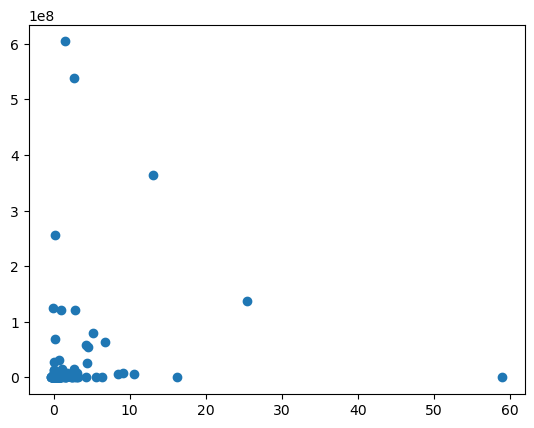

In [13]:
plt.scatter(x = currentCustomers['Total_Lifetime_Spend'],y = currentCustomers['Revenue_(in_000s_USD)'])

In [14]:
#Normalizing the data
customersNorm = (currentCustomers.iloc[:,1:] - currentCustomers.iloc[:,1:].mean())/currentCustomers.iloc[:,1:].std()
customersNorm

C:\Users\Yash\AppData\Local\Temp\ipykernel_33052\1177161580.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  customersNorm = (currentCustomers.iloc[:,1:] - currentCustomers.iloc[:,1:].mean())/currentCustomers.iloc[:,1:].std()
C:\Users\Yash\AppData\Local\Temp\ipykernel_33052\1177161580.py:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  customersNorm = (currentCustomers.iloc[:,1:] - currentCustomers.iloc[:,1:].mean())/currentCustomers.iloc[:,1:].std()


,Alexa_Rank,All_Industries,All_Investors,All_Sub-Industries,Business_Model,Certification_Date,Certified_Active_Company,CompanyID,Company_City,Company_Country,...,Recent_Funding_Round,Recent_Investors,Revenue_(in_000s_USD),Revenue_Range_(in_USD),SIC_Code_1,SIC_Code_2,SIC_Codes,Secondary_Industry_Hierarchical_Category,Total_Funding_Amount_(in_000s_USD),Total_Lifetime_Spend
0,-0.859522,NaN,NaN,NaN,NaN,NaN,NaN,-1.069378,NaN,NaN,...,NaN,NaN,10.008386,NaN,1.458941,0.849987,NaN,NaN,-0.148468,0.476066
1,-0.859523,NaN,NaN,NaN,NaN,NaN,NaN,-0.989003,NaN,NaN,...,NaN,NaN,4.687840,NaN,0.509030,1.311709,NaN,NaN,0.470776,-0.163020
2,-0.858916,NaN,NaN,NaN,NaN,NaN,NaN,-1.075997,NaN,NaN,...,NaN,NaN,1.026385,NaN,1.310849,1.755521,NaN,NaN,0.396517,1.534048
3,-0.847659,NaN,NaN,NaN,NaN,NaN,NaN,-0.845349,NaN,NaN,...,NaN,NaN,6.718760,NaN,-3.077030,-1.048345,NaN,NaN,-0.164303,3.141120
4,-0.859434,NaN,NaN,NaN,NaN,NaN,NaN,-0.394333,NaN,NaN,...,NaN,NaN,2.420124,NaN,-0.960086,0.476182,NaN,NaN,-0.164303,6.331606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,0.795714,NaN,NaN,NaN,NaN,NaN,NaN,0.926895,NaN,NaN,...,NaN,NaN,-0.167815,NaN,-0.994306,-0.933403,NaN,NaN,-0.164303,-0.196976
325,-0.383121,NaN,NaN,NaN,NaN,NaN,NaN,0.792391,NaN,NaN,...,NaN,NaN,-0.167858,NaN,0.500180,-0.851023,NaN,NaN,-0.164303,-0.205520
326,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.904562,NaN,NaN,...,NaN,NaN,-0.167885,NaN,0.596351,-0.845813,NaN,NaN,-0.164303,-0.209474
327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.865303,NaN,NaN,...,NaN,NaN,-0.167853,NaN,0.409909,0.912505,NaN,NaN,-0.164303,-0.176308


## Current Customers EDA - Yashasvi Bhati

In [15]:
currentCustomers.info() #knowning about our dataframe. This step gives us a brief idea about our dataset. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329 entries, 0 to 328
Data columns (total 43 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Current_Customer                               329 non-null    object 
 1   CompanyID                                      329 non-null    int64  
 2   Founded_Year                                   311 non-null    float64
 3   Revenue_(in_000s_USD)                          329 non-null    int64  
 4   Revenue_Range_(in_USD)                         329 non-null    object 
 5   Est_Marketing_Department_Budget_(in_000s_USD)  327 non-null    float64
 6   Est_Finance_Department_Budget_(in_000s_USD)    327 non-null    float64
 7   Est_IT_Department_Budget_(in_000s_USD)         327 non-null    float64
 8   Est_HR_Department_Budget_(in_000s_USD)         329 non-null    int64  
 9   Employees                                      329 non

In [16]:
print(currentCustomers.duplicated().sum()) #ensuring we dont have any duplicated data.

0


In [17]:
#Exploring the different observations in Current Customers
for columnName in currentCustomers.columns:
    print(columnName)

Current_Customer
CompanyID
Founded_Year
Revenue_(in_000s_USD)
Revenue_Range_(in_USD)
Est_Marketing_Department_Budget_(in_000s_USD)
Est_Finance_Department_Budget_(in_000s_USD)
Est_IT_Department_Budget_(in_000s_USD)
Est_HR_Department_Budget_(in_000s_USD)
Employees
Employee_Range
Past_1_Year_Employee_Growth_Rate
Past_2_Year_Employee_Growth_Rate
SIC_Code_1
SIC_Code_2
SIC_Codes
NAICS_Code_1
NAICS_Code_2
NAICS_Codes
Primary_Industry
Primary_Sub-Industry
All_Industries
All_Sub-Industries
Industry_Hierarchical_Category
Secondary_Industry_Hierarchical_Category
Alexa_Rank
Ownership_Type
Business_Model
Certified_Active_Company
Certification_Date
Total_Funding_Amount_(in_000s_USD)
Recent_Funding_Amount_(in_000s_USD)
Recent_Funding_Round
Recent_Funding_Date
Recent_Investors
All_Investors
Company_City
Company_State
Company_Zip_Code
Company_Country
Number_of_Locations
Company_Is_Acquired
Total_Lifetime_Spend


In [18]:
currentCustomers['CompanyID'].unique() #ensuring CompanyID is unique to be treated as key later on in the code 

array([   1475361,   16400573,     246280,   43076614,  126828694,
        105562330,   28117851,    3194954,    2555990,    8929846,
         62637459,   44322135,   32394811,   27181208,   68799582,
        491442528,    7503938,   18796172,   89440718,  190857276,
         77939460,   20467876,   61949294,   13206029,   20054213,
          6178232,   37831131,   13780132,   18241240,    2903082,
        345500334,  483828705,   50466149,  346149199,   28262557,
         27003689,  313065571,   25346393,    8274594,   24412371,
         25743000,   57051791,   25231738,   15616792,   18319464,
        356329695,   65047797,  347800965,   25987521,  106545259,
         24937986,   56953886,   41341781,   24169680,   83740613,
         65145132,   14271049,  348430186,   84607197,   17859287,
        354039914,   44241896,   12880807,  346209844,   70173366,
         48041812,  356795454,   63767787,  397525154,  447046875,
         15567237,  440804842,  352817298,   26988006,   16061

In [19]:
categorical_feature = currentCustomers.select_dtypes(include=['object', 'category']).columns 
print(categorical_feature) #identifying the categorical features from the dataset and printing the header

Index(['Current_Customer', 'Revenue_Range_(in_USD)', 'Employee_Range',
       'SIC_Codes', 'NAICS_Codes', 'Primary_Industry', 'Primary_Sub-Industry',
       'All_Industries', 'All_Sub-Industries',
       'Industry_Hierarchical_Category',
       'Secondary_Industry_Hierarchical_Category', 'Ownership_Type',
       'Business_Model', 'Certified_Active_Company', 'Certification_Date',
       'Recent_Funding_Round', 'Recent_Funding_Date', 'Recent_Investors',
       'All_Investors', 'Company_City', 'Company_State', 'Company_Zip_Code',
       'Company_Country', 'Company_Is_Acquired'],
      dtype='object')


In [20]:
numerical_feature = currentCustomers.select_dtypes(include=['int64', 'float64'])
numerical_feature.columns 
print (numerical_feature.columns) #identifying the numerical feature from the dataset 

Index(['CompanyID', 'Founded_Year', 'Revenue_(in_000s_USD)',
       'Est_Marketing_Department_Budget_(in_000s_USD)',
       'Est_Finance_Department_Budget_(in_000s_USD)',
       'Est_IT_Department_Budget_(in_000s_USD)',
       'Est_HR_Department_Budget_(in_000s_USD)', 'Employees',
       'Past_1_Year_Employee_Growth_Rate', 'Past_2_Year_Employee_Growth_Rate',
       'SIC_Code_1', 'SIC_Code_2', 'NAICS_Code_1', 'NAICS_Code_2',
       'Alexa_Rank', 'Total_Funding_Amount_(in_000s_USD)',
       'Recent_Funding_Amount_(in_000s_USD)', 'Number_of_Locations',
       'Total_Lifetime_Spend'],
      dtype='object')


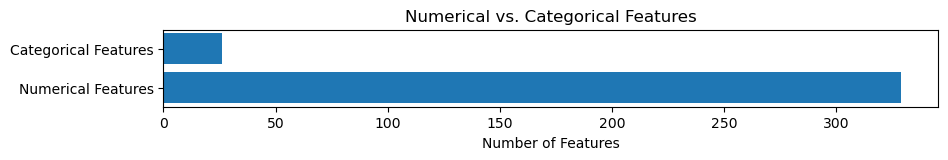

In [64]:
fig, ax = plt.subplots(figsize=(10, 1))
ax.barh(['Numerical Features', 'Categorical Features'], [len(numerical_feature), len(categorical_feature)])
ax.set_xlabel('Number of Features')
ax.set_title('Numerical vs. Categorical Features')

plt.show()

## What's the largest revenue made by a company?

In [65]:
currentCustomers.sort_values(by="Revenue_(in_000s_USD)",ascending=False).head(5) #This code helps to sort the values for revenue in descending order whose output gives us top 5 company who generated highest revenue 

,Current_Customer,CompanyID,Founded_Year,Revenue_(in_000s_USD),Revenue_Range_(in_USD),Est_Marketing_Department_Budget_(in_000s_USD),Est_Finance_Department_Budget_(in_000s_USD),Est_IT_Department_Budget_(in_000s_USD),Est_HR_Department_Budget_(in_000s_USD),Employees,...,Recent_Funding_Date,Recent_Investors,All_Investors,Company_City,Company_State,Company_Zip_Code,Company_Country,Number_of_Locations,Company_Is_Acquired,Total_Lifetime_Spend
8,Y,2555990,1933.0,604284257,Over $5 bil.,30214212.0,6042842.0,17524243.0,122829,70496,...,NaN,NaN,NaN,Dhahran,Eastern Province,31311,Saudi Arabia,5.0,NaN,1.503093
0,Y,1475361,1994.0,538046000,Over $5 bil.,69407934.0,5380460.0,15065288.0,4041427,1541000,...,14-May-97,NaN,NaN,Seattle,Washington,98109,United States,37.0,NaN,2.630822
3,Y,43076614,1999.0,364115000,Over $5 bil.,18205750.0,3641150.0,10559335.0,139776,62000,...,NaN,NaN,NaN,Spring,Texas,77389,United States,28.0,NaN,13.025724
1,Y,16400573,1998.0,256735000,Over $5 bil.,33118815.0,2567350.0,7188580.0,228090,160000,...,19-Aug-04,Undisclosed,Andy Bechtolsheim;Undisclosed;Kleiner Perkins ...,Mountain View,California,94043,United States,91.0,NaN,0.138103
4,Y,126828694,1983.0,136835000,Over $5 bil.,11083635.0,2052525.0,5062895.0,253627,112500,...,NaN,NaN,NaN,New York City,New York,10036,United States,55.0,NaN,25.470047


## What's the least revenue made by a company?

In [66]:
currentCustomers.sort_values(by="Revenue_(in_000s_USD)",ascending=True).head(5) #This code helps to sort the values in ascending order whose output gives us least revenue generated by a company

,Current_Customer,CompanyID,Founded_Year,Revenue_(in_000s_USD),Revenue_Range_(in_USD),Est_Marketing_Department_Budget_(in_000s_USD),Est_Finance_Department_Budget_(in_000s_USD),Est_IT_Department_Budget_(in_000s_USD),Est_HR_Department_Budget_(in_000s_USD),Employees,...,Recent_Funding_Date,Recent_Investors,All_Investors,Company_City,Company_State,Company_Zip_Code,Company_Country,Number_of_Locations,Company_Is_Acquired,Total_Lifetime_Spend
326,Y,32080939,2001.0,232,"Under $500,000",18.0,3.0,8.0,4,2,...,NaN,NaN,NaN,Atlanta,Georgia,30342,United States,1.0,NaN,-0.043088
132,Y,71960561,1984.0,518,"$500,000 - $1 mil.",41.0,7.0,19.0,547,260,...,20-May-22,Astra Capital Management;O’Connor Capital Solu...,Astra Capital Management;O’Connor Capital Solu...,Houston,Texas,77092,United States,23.0,NaN,1.560141
312,Y,462258491,2012.0,803,"$500,000 - $1 mil.",105.0,8.0,27.0,14,6,...,NaN,NaN,NaN,Spring,Texas,77389,United States,2.0,NaN,-0.024687
293,Y,355569639,2010.0,830,"$500,000 - $1 mil.",107.0,8.0,43.0,14,6,...,NaN,NaN,NaN,Atlantic Highlands,New Jersey,7716,United States,6.0,NaN,-0.061400
328,Y,441325878,2013.0,912,"$500,000 - $1 mil.",119.0,9.0,33.0,17,6,...,NaN,NaN,NaN,Mount Prospect,Illinois,60056,United States,3.0,NaN,-0.054922


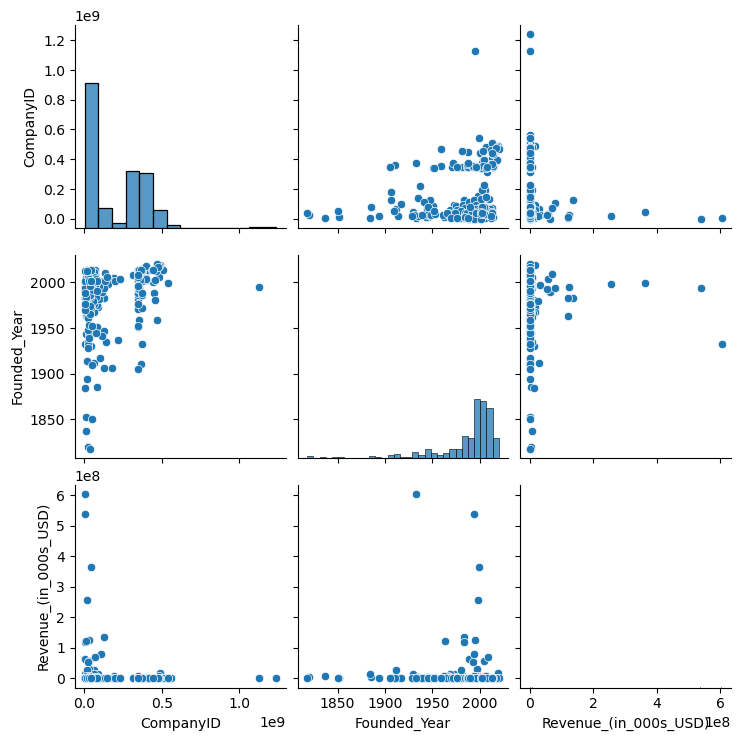

In [67]:
sns.pairplot(currentCustomers.iloc[:,1:4]) #plotting a pairplot from columns 1 to 4

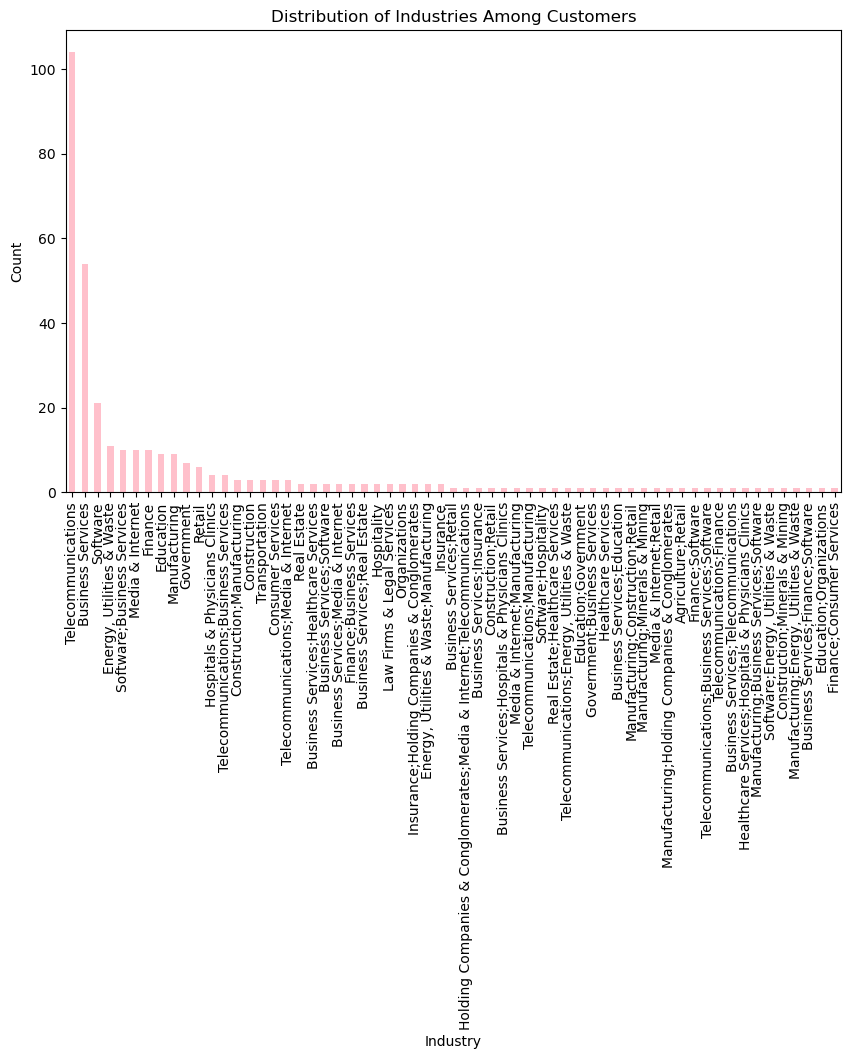

In [68]:
allIndustryCount = currentCustomers['All_Industries'].value_counts()
plt.figure(figsize=(10, 6))

allIndustryCount.plot(kind='bar', color='pink')

plt.xlabel('Industry') #Labelling x axis as All industry
plt.ylabel('Count')    #Labelling y axis as total count
plt.title('Distribution of Industries Among Customers') #title for the bar graph
plt.xticks(rotation=90)  # Rotate x-axis labels if needed

plt.show() 

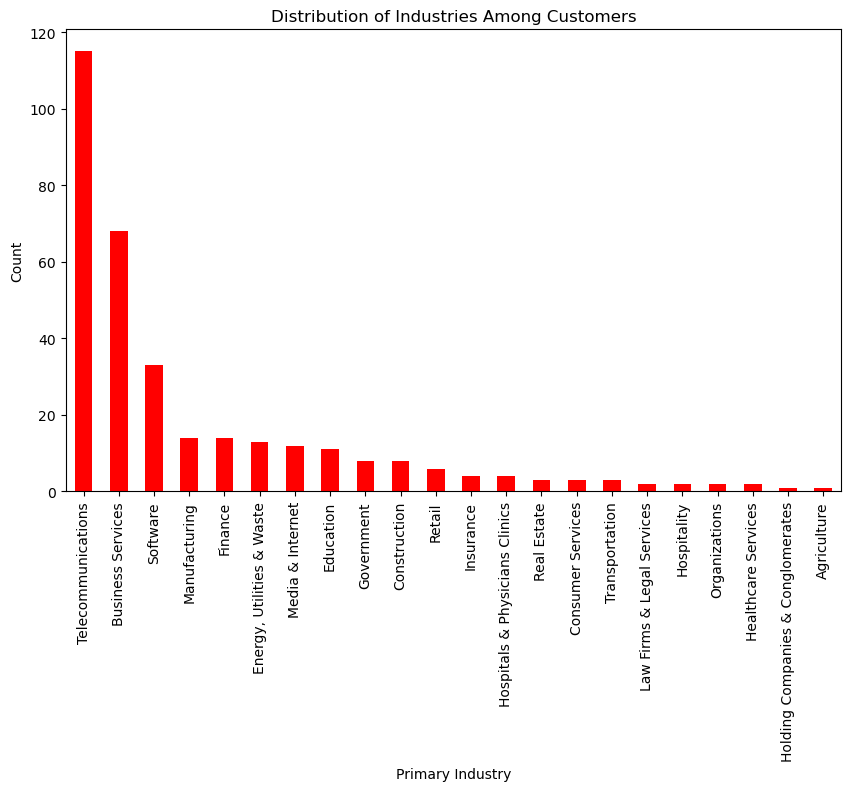

In [69]:
primaryIndustryCount = currentCustomers['Primary_Industry'].value_counts()
plt.figure(figsize=(10, 6))

primaryIndustryCount.plot(kind='bar', color='red')

plt.xlabel('Primary Industry')
plt.ylabel('Count')
plt.title('Distribution of Industries Among Customers')
plt.xticks(rotation=90) 

plt.show()

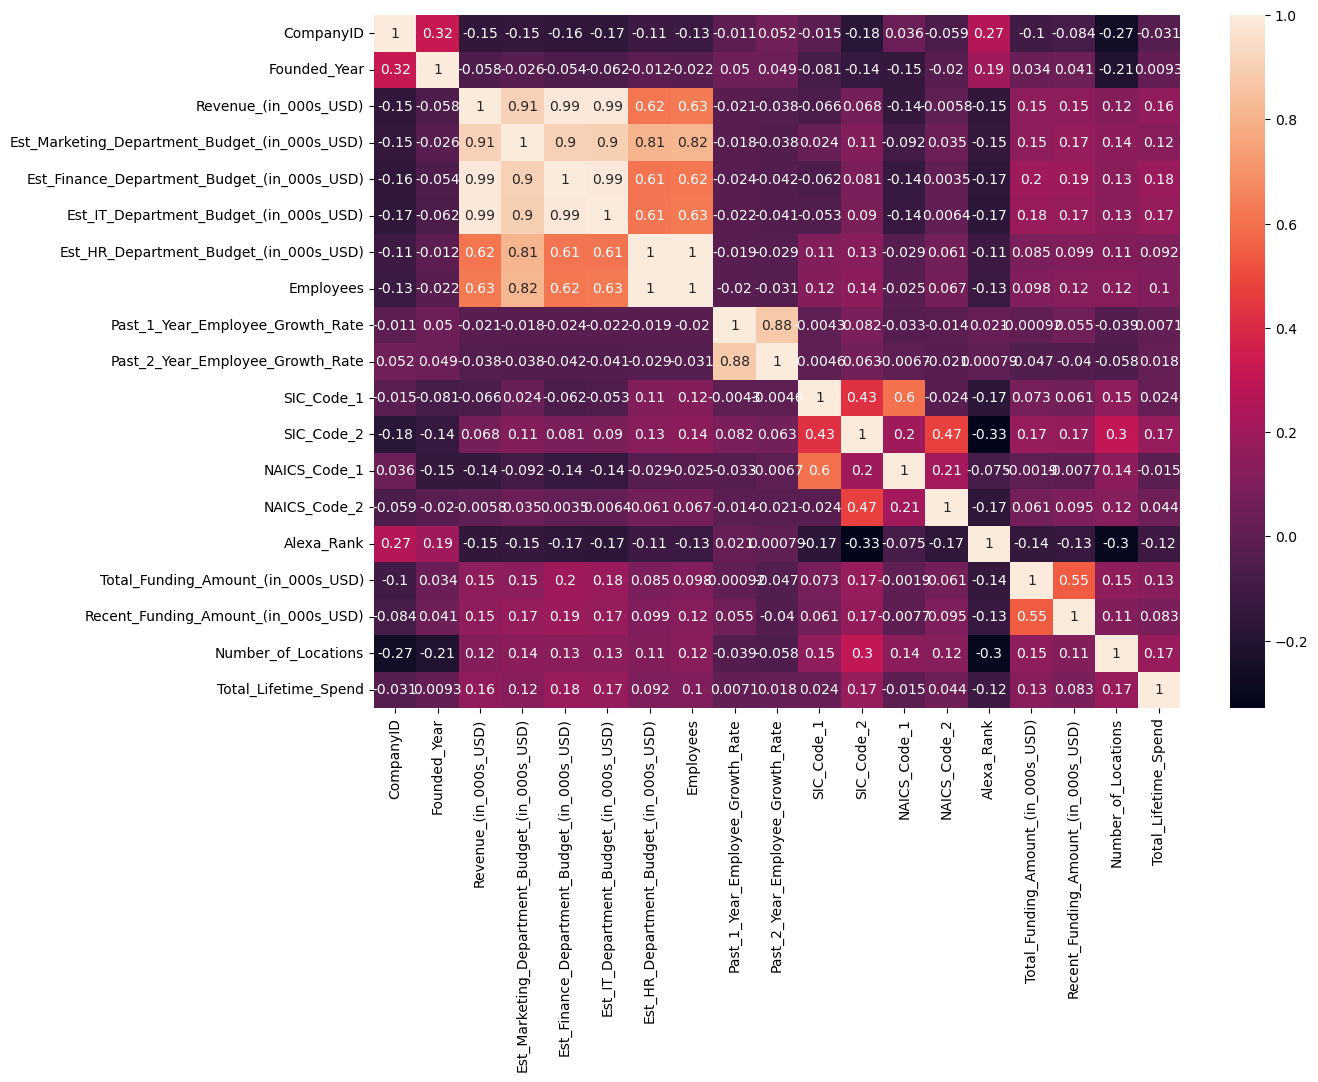

In [70]:
sns.heatmap(numerical_feature.corr(),annot = True)
plt.rcParams['figure.figsize'] = (13,9)
plt.show() 

C:\Users\Yash\AppData\Local\Temp\ipykernel_33052\1863763987.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  CNorm = (currentCustomers.iloc[:,0:] - currentCustomers.iloc[:,0:].mean())/currentCustomers.iloc[:,0:].std()
C:\Users\Yash\AppData\Local\Temp\ipykernel_33052\1863763987.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  CNorm = (currentCustomers.iloc[:,0:] - currentCustomers.iloc[:,0:].mean())/currentCustomers.iloc[:,0:].std()


<Axes: >

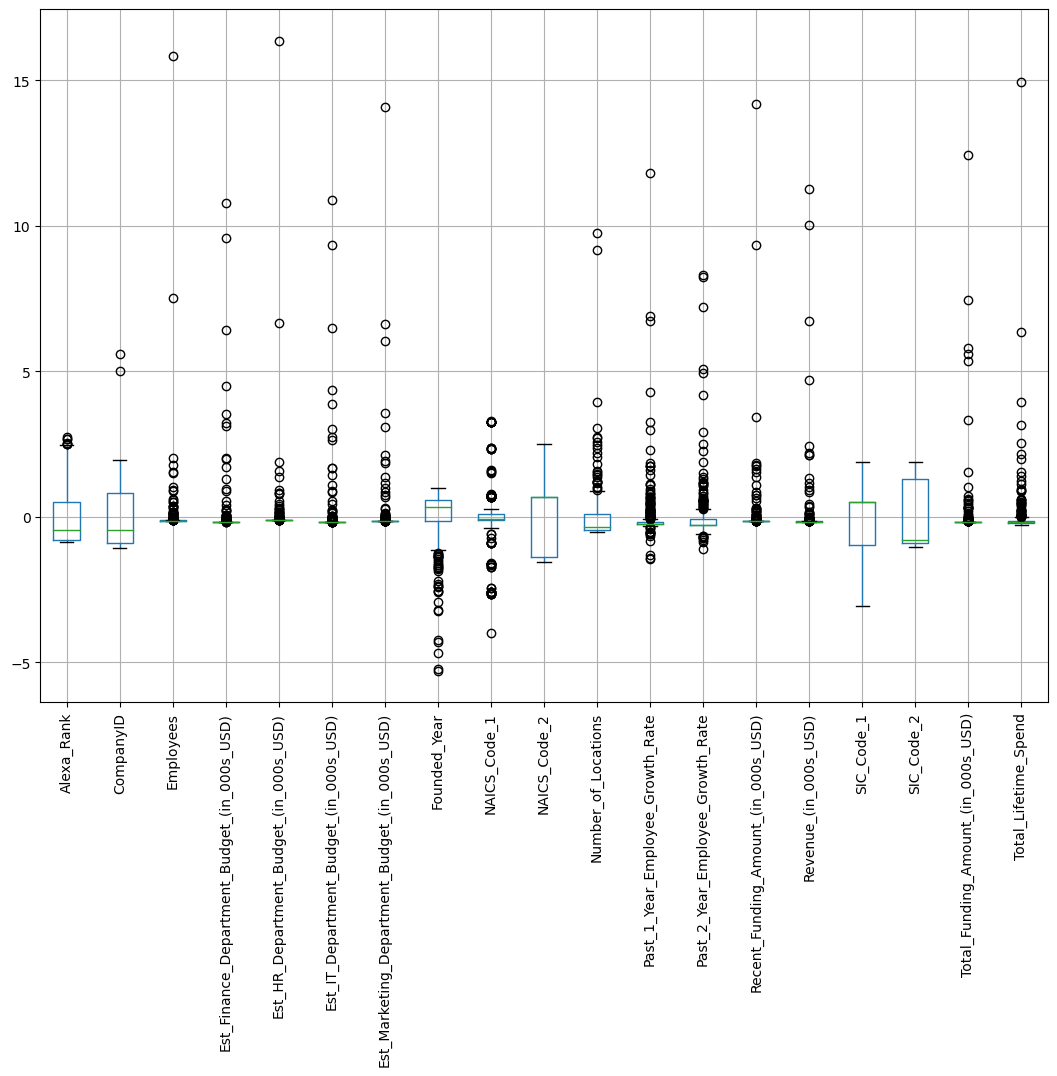

In [71]:
CNorm = (currentCustomers.iloc[:,0:] - currentCustomers.iloc[:,0:].mean())/currentCustomers.iloc[:,0:].std()
CNorm.boxplot(rot=90) #Normalising Data

## Prospective Customers EDA - Shivam Bhagat

In [54]:
prospectList = pd.read_csv('prospect_list.csv')
prospectList.head(5)

,Current_Customer,CompanyID,Founded_Year,Company_HQ_Phone,Fax,Revenue_(in_000s_USD),Revenue_Range_(in_USD),Est_Marketing_Department_Budget_(in_000s_USD),Est_Finance_Department_Budget_(in_000s_USD),Est_IT_Department_Budget_(in_000s_USD),...,Recent_Funding_Round,Recent_Funding_Date,Recent_Investors,All_Investors,Company_City,Company_State,Company_Zip_Code,Company_Country,Number_of_Locations,Company_Is_Acquired
0,N,2441797,1976.0,(408) 996-1010,(408) 974-2113,387537000.0,Over $5 bil.,31390497.0,5813055.0,14338869.0,...,Share Placement,16-May-16,Berkshire Hathaway,Mike Markkula;Microsoft;Berkshire Hathaway,Cupertino,California,95014,United States,23.0,NaN
1,N,155353090,1962.0,(479) 273-4000,(479) 277-1830,630794000.0,Over $5 bil.,76956868.0,6307940.0,12615880.0,...,Stock Issuance/Offering,1-Mar-72,NaN,Arvest Bank Group;First National Bank of Comme...,Bentonville,Arkansas,72716,United States,4202.0,NaN
2,N,24904409,1975.0,(425) 882-8080,(425) 936-7329,204094000.0,Over $5 bil.,26736314.0,2040940.0,7551478.0,...,Other Financing Round,1-Sep-81,Technology Venture Investors,Technology Venture Investors,Redmond,Washington,98052,United States,63.0,NaN
3,N,10256729,1963.0,(401) 765-1500,NaN,339204000.0,Over $5 bil.,41382888.0,3392040.0,6784080.0,...,NaN,NaN,NaN,NaN,Woonsocket,Rhode Island,2895,United States,31.0,NaN
4,N,141738322,1938.0,+82 312001114,(82)31-200-7538,214420431.0,Over $5 bil.,17368054.0,3216306.0,7933555.0,...,NaN,NaN,NaN,NaN,Suwon-si,Gyeonggi-do,16677,South Korea,30.0,NaN


  Current_Customer  CompanyID  Founded_Year Company_HQ_Phone              Fax  \
0                N    2441797        1976.0   (408) 996-1010   (408) 974-2113   
1                N  155353090        1962.0   (479) 273-4000   (479) 277-1830   
2                N   24904409        1975.0   (425) 882-8080   (425) 936-7329   
3                N   10256729        1963.0   (401) 765-1500              NaN   
4                N  141738322        1938.0    +82 312001114  (82)31-200-7538   

   Revenue_(in_000s_USD) Revenue_Range_(in_USD)  \
0            387537000.0           Over $5 bil.   
1            630794000.0           Over $5 bil.   
2            204094000.0           Over $5 bil.   
3            339204000.0           Over $5 bil.   
4            214420431.0           Over $5 bil.   

   Est_Marketing_Department_Budget_(in_000s_USD)  \
0                                     31390497.0   
1                                     76956868.0   
2                                     26736314.0  

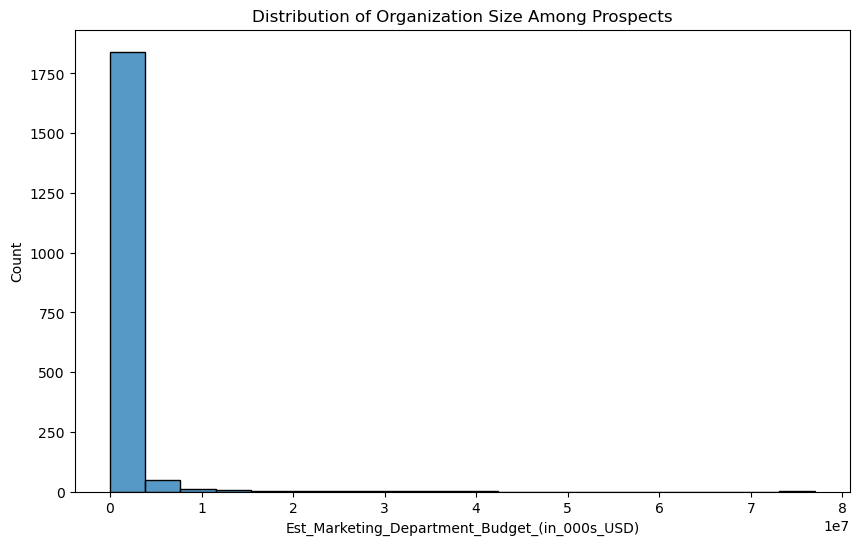

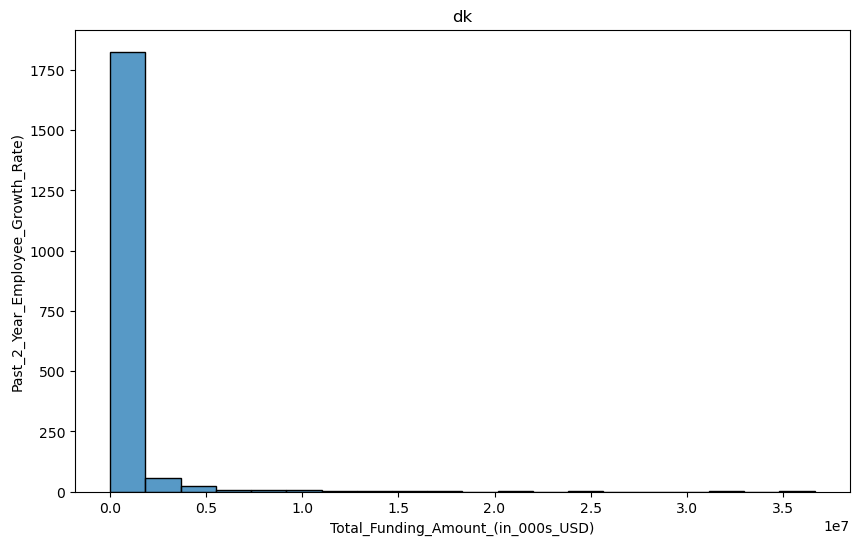

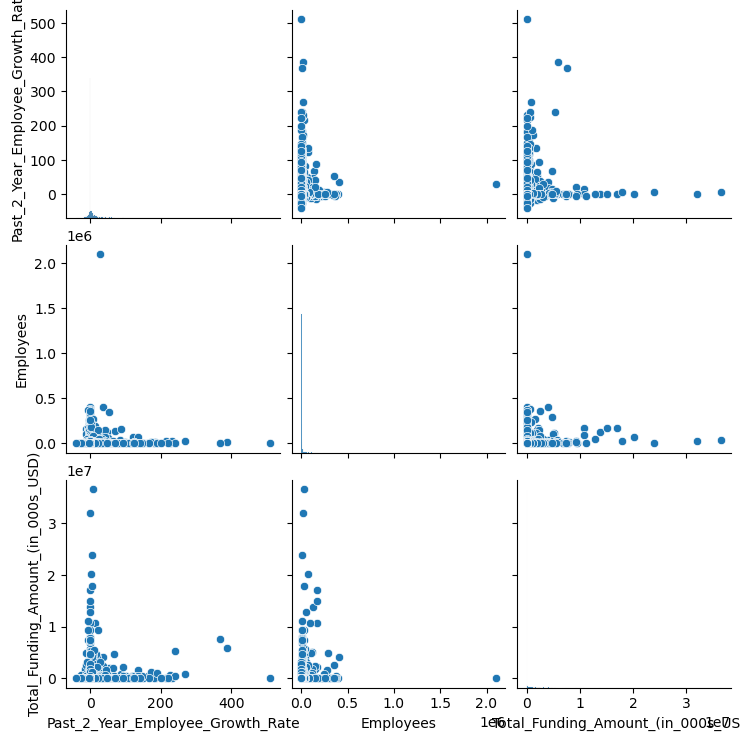

In [55]:
# Print the first few rows of the dataframe
print(prospectList.head())

# Plot a histogram of the "Organization Size" feature
plt.figure(figsize=(10,6))
sns.histplot(data=prospectList, x="Est_Marketing_Department_Budget_(in_000s_USD)", bins=20, kde=False)
plt.title("Distribution of Organization Size Among Prospects")
plt.xlabel("Est_Marketing_Department_Budget_(in_000s_USD)")
plt.ylabel("Count")
plt.show()

# Plot a histogram of the "" feature
plt.figure(figsize=(10,6))
sns.histplot(data=prospectList, x="Total_Funding_Amount_(in_000s_USD)", bins=20, kde=False)
plt.title("dk")
plt.xlabel("Total_Funding_Amount_(in_000s_USD)")
plt.ylabel("Past_2_Year_Employee_Growth_Rate)")
plt.show()

# Create a pairplot to visualize the relationship between the numeric features
sns.pairplot(prospectList, vars=['Past_2_Year_Employee_Growth_Rate', 'Employees', 'Total_Funding_Amount_(in_000s_USD)'])
plt.show()

In [56]:
# Get the descriptive statistics of the dataframe
print(prospectList.describe())

          CompanyID  Founded_Year  Revenue_(in_000s_USD)  \
count  1.929000e+03   1900.000000           1.928000e+03   
mean   1.594947e+08   1973.406842           8.147745e+06   
std    1.622255e+08     44.143791           3.308988e+07   
min    1.512110e+05   1806.000000           5.000000e+00   
25%    2.760920e+07   1953.750000           2.575225e+04   
50%    7.426939e+07   1992.000000           4.201030e+05   
75%    3.474003e+08   2005.000000           3.676687e+06   
max    1.194462e+09   2021.000000           6.307940e+08   

       Est_Marketing_Department_Budget_(in_000s_USD)  \
count                                   1.924000e+03   
mean                                    7.490350e+05   
std                                     3.220577e+06   
min                                     2.600000e+01   
25%                                     2.601500e+03   
50%                                     3.960800e+04   
75%                                     3.383512e+05   
max        

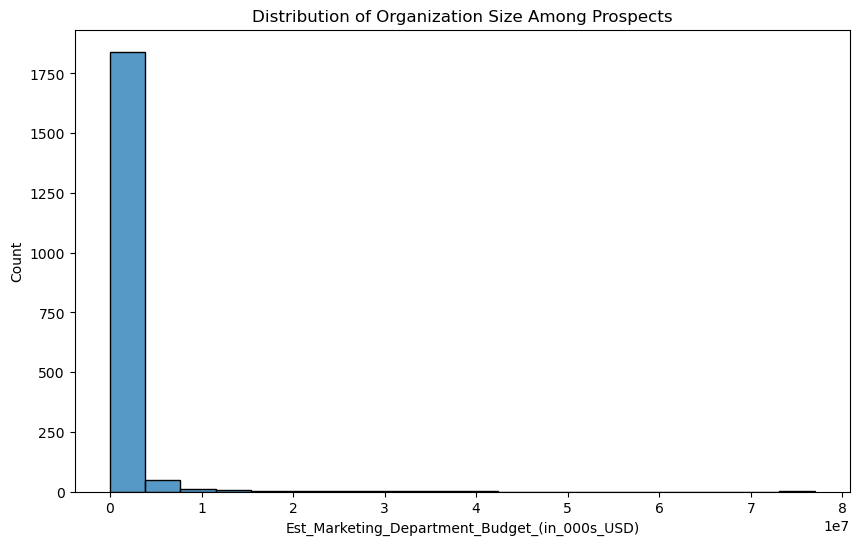

In [57]:
# Plot a histogram of the "Organization Size" feature
plt.figure(figsize=(10,6))
sns.histplot(data=prospectList, x="Est_Marketing_Department_Budget_(in_000s_USD)", bins=20, kde=False)
plt.title("Distribution of Organization Size Among Prospects")
plt.xlabel("Est_Marketing_Department_Budget_(in_000s_USD)")
plt.ylabel("Count")
plt.show()

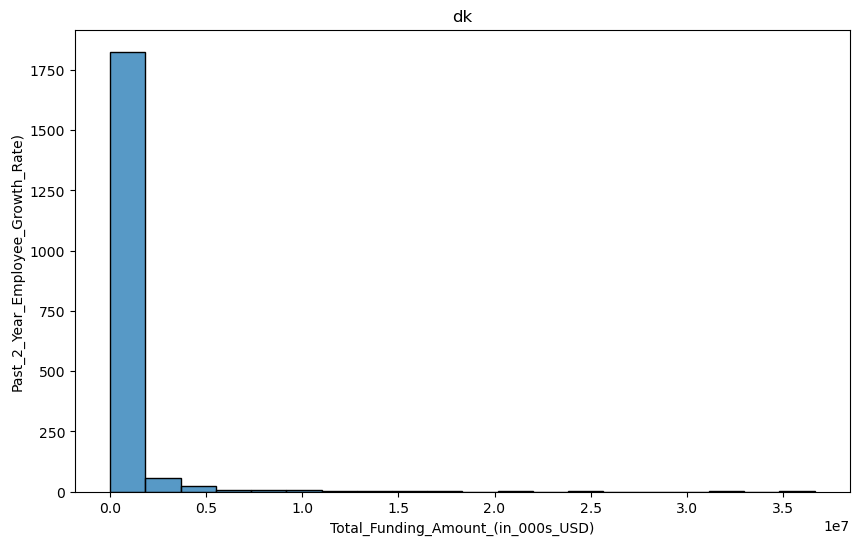

In [58]:
# Plot a histogram of the "" feature
plt.figure(figsize=(10,6))
sns.histplot(data=prospectList, x="Total_Funding_Amount_(in_000s_USD)", bins=20, kde=False)
plt.title("dk")
plt.xlabel("Total_Funding_Amount_(in_000s_USD)")
plt.ylabel("Past_2_Year_Employee_Growth_Rate)")
plt.show()

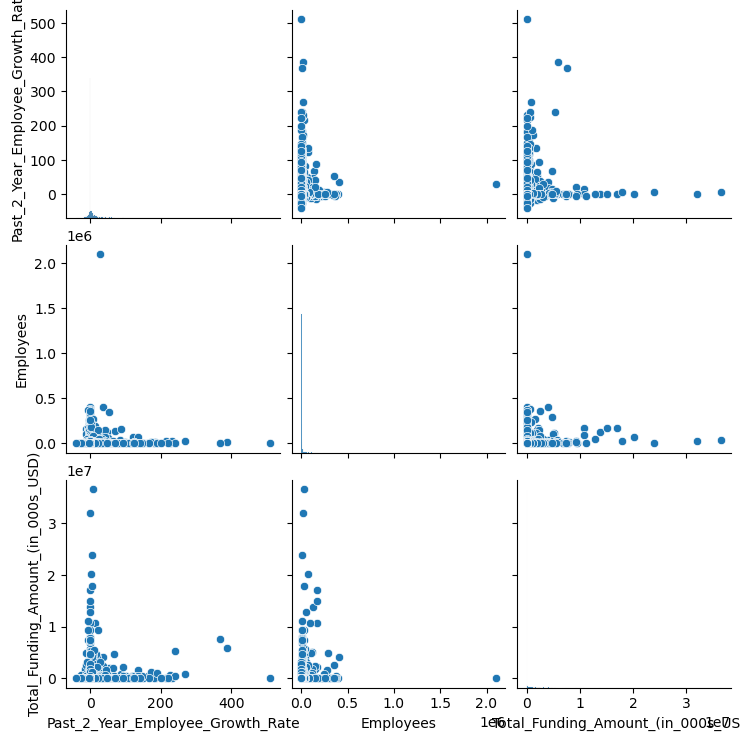

In [45]:
# Create a pairplot to visualize the relationship between the numeric features
sns.pairplot(prospectList, vars=['Past_2_Year_Employee_Growth_Rate', 'Employees', 'Total_Funding_Amount_(in_000s_USD)'])
plt.show()

## Which top 10 companies generated the most revenue?

In [59]:
prospectList.sort_values(by="Revenue_(in_000s_USD)",ascending=False).head(10)  #This code helps to sort the values for revenue in descending order whose output gives us top 5 company who generated highest revenue 

,Current_Customer,CompanyID,Founded_Year,Company_HQ_Phone,Fax,Revenue_(in_000s_USD),Revenue_Range_(in_USD),Est_Marketing_Department_Budget_(in_000s_USD),Est_Finance_Department_Budget_(in_000s_USD),Est_IT_Department_Budget_(in_000s_USD),...,Recent_Funding_Round,Recent_Funding_Date,Recent_Investors,All_Investors,Company_City,Company_State,Company_Zip_Code,Company_Country,Number_of_Locations,Company_Is_Acquired
1,N,155353090,1962.0,(479) 273-4000,(479) 277-1830,630794000.0,Over $5 bil.,76956868.0,6307940.0,12615880.0,...,Stock Issuance/Offering,1-Mar-72,NaN,Arvest Bank Group;First National Bank of Comme...,Bentonville,Arkansas,72716,United States,4202.0,NaN
12,N,37934049,1907.0,+44 2079341234,NaN,479075284.0,Over $5 bil.,23953764.0,4790752.0,13893183.0,...,NaN,NaN,NaN,NaN,London,Greater London,SE1 7NA,United Kingdom,38.0,NaN
0,N,2441797,1976.0,(408) 996-1010,(408) 974-2113,387537000.0,Over $5 bil.,31390497.0,5813055.0,14338869.0,...,Share Placement,16-May-16,Berkshire Hathaway,Mike Markkula;Microsoft;Berkshire Hathaway,Cupertino,California,95014,United States,23.0,NaN
22,N,3444162,1989.0,(800) 827-1000,(202) 495-5660,371510000.0,Over $5 bil.,8916240.0,3715100.0,8916240.0,...,NaN,NaN,NaN,NaN,Washington,District of Columbia,20420,United States,198.0,NaN
3,N,10256729,1963.0,(401) 765-1500,NaN,339204000.0,Over $5 bil.,41382888.0,3392040.0,6784080.0,...,NaN,NaN,NaN,NaN,Woonsocket,Rhode Island,2895,United States,31.0,NaN
8,N,39600454,1977.0,(952) 936-1300,(860) 728-7979,322132000.0,Over $5 bil.,42199292.0,3221320.0,10952488.0,...,NaN,NaN,NaN,NaN,Minnetonka,Minnesota,55343,United States,50.0,NaN
191,N,459073254,2015.0,(650) 253-0000,NaN,289531000.0,Over $5 bil.,22583418.0,2171482.0,15634674.0,...,NaN,NaN,NaN,NaN,Mountain View,California,94043,United States,4.0,NaN
13,N,5358630,1909.0,+44 2074964000,+44 (0)20 7496 4630,285517123.0,Over $5 bil.,14275856.0,2855171.0,8279996.0,...,Private Equity,16-Oct-20,The Universities Superannuation Scheme,The Universities Superannuation Scheme,London,Greater London,SW1Y 4PD,United Kingdom,35.0,NaN
14,N,24231957,1833.0,(972) 446-4800,(780) 486-8708,284040000.0,Over $5 bil.,37209240.0,2840400.0,9657360.0,...,Debt,7-Nov-22,TD,TD;Bank of America;Rock River Capital Partners...,Irving,Texas,75039,United States,44.0,NaN
9,N,7783252,1879.0,(925) 842-1000,+55 21 2510 5910,235717000.0,Over $5 bil.,11785850.0,2357170.0,6835793.0,...,NaN,NaN,NaN,NaN,San Ramon,California,94583,United States,40.0,NaN


## Identifying numerical values

In [60]:
ndf=prospectList.select_dtypes(include=np.number) #From the Dataframe this selects columns that as int value which are numerical

In [61]:
ndf.head()

,CompanyID,Founded_Year,Revenue_(in_000s_USD),Est_Marketing_Department_Budget_(in_000s_USD),Est_Finance_Department_Budget_(in_000s_USD),Est_IT_Department_Budget_(in_000s_USD),Est_HR_Department_Budget_(in_000s_USD),Employees,Past_1_Year_Employee_Growth_Rate,Past_2_Year_Employee_Growth_Rate,SIC_Code_1,SIC_Code_2,NAICS_Code_1,NAICS_Code_2,Alexa_Rank,Total_Funding_Amount_(in_000s_USD),Recent_Funding_Amount_(in_000s_USD),Number_of_Locations
0,2441797,1976.0,387537000.0,31390497.0,5813055.0,14338869.0,369732,164000,0.0,0.0,8732,5045.0,423430,334220,89.0,2162250,1000000,23.0
1,155353090,1962.0,630794000.0,76956868.0,6307940.0,12615880.0,4734373,2100000,11.2,28.9,6719,5411.0,551114,455110,81.0,6850,3000,4202.0
2,24904409,1975.0,204094000.0,26736314.0,2040940.0,7551478.0,475335,210842,-4.4,-4.4,7389,7379.0,518210,513210,44.0,1000,1000,63.0
3,10256729,1963.0,339204000.0,41382888.0,3392040.0,6784080.0,482455,214000,0.0,0.0,8093,8049.0,812199,621498,454.0,0,0,31.0
4,141738322,1938.0,214420431.0,17368054.0,3216306.0,7933555.0,729557,323606,0.0,0.0,5731,5064.0,449210,334419,35.0,0,0,30.0


## Identifying categorical feature

In [62]:
categorical_feature = [i for i in prospectList.columns if prospectList[i].dtypes == 'O'] ##From the DataFrame it checks all the data types from the columns and if it is an object type data it is a categorical data.

In [63]:
prospectList[categorical_feature].head()

,Current_Customer,Company_HQ_Phone,Fax,Revenue_Range_(in_USD),Employee_Range,SIC_Codes,NAICS_Codes,Primary_Industry,Primary_Sub-Industry,All_Industries,...,Certification_Date,Recent_Funding_Round,Recent_Funding_Date,Recent_Investors,All_Investors,Company_City,Company_State,Company_Zip_Code,Company_Country,Company_Is_Acquired
0,N,(408) 996-1010,(408) 974-2113,Over $5 bil.,Employees.10000plus,50;504;5045;87;873;8732;73;737;36;365;367;3679...,33;334;3341;33411;334112;334111;334118;42;423;...,Manufacturing,Computer Equipment & Peripherals,Manufacturing,...,12-Sep-23,Share Placement,16-May-16,Berkshire Hathaway,Mike Markkula;Microsoft;Berkshire Hathaway,Cupertino,California,95014,United States,NaN
1,N,(479) 273-4000,(479) 277-1830,Over $5 bil.,Employees.10000plus,67;671;6719;50;506;5064;53;539;5399;531;5311;5...,42;424;4249;42499;424990;45;455;4551;45511;455...,Retail,"Department Stores, Shopping Centers & Superstores",Retail,...,24-Sep-23,Stock Issuance/Offering,1-Mar-72,NaN,Arvest Bank Group;First National Bank of Comme...,Bentonville,Arkansas,72716,United States,NaN
2,N,(425) 882-8080,(425) 936-7329,Over $5 bil.,Employees.10000plus,73;737;7379;738;7389;7374;35;357;3575;3571;36;...,51;513;5132;51321;513210;33;334;3341;33411;334...,Software,Database & File Management Software,Software;Manufacturing,...,25-Sep-23,Other Financing Round,1-Sep-81,Technology Venture Investors,Technology Venture Investors,Redmond,Washington,98052,United States,NaN
3,N,(401) 765-1500,NaN,Over $5 bil.,Employees.10000plus,51;512;5122;72;729;7299;59;591;5912;80;804;804...,42;424;4242;42421;424210;81;812;8121;81219;812...,Retail,Drug Stores & Pharmacies,Retail;Consumer Services,...,9-Sep-23,NaN,NaN,NaN,NaN,Woonsocket,Rhode Island,2895,United States,NaN
4,N,+82 312001114,(82)31-200-7538,Over $5 bil.,Employees.10000plus,36;367;3679;57;573;5731;50;506;5064;35;357;357...,44;449;4492;44921;449210;33;334;3341;33411;334...,Manufacturing,Telecommunication Equipment,Manufacturing,...,22-Sep-23,NaN,NaN,NaN,NaN,Suwon-si,Gyeonggi-do,16677,South Korea,NaN
